In [1]:
from keras.models import Sequential
from keras.layers import Dense
import keras.optimizers
from csv import reader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
df = pd.read_csv("data3.csv")

In [3]:
df.fillna(df.mean())

,Age,Gender,TB Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Label
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
dataset = np.array(df)

In [5]:
X = dataset[:,0:10].astype(float)
Y = dataset[:,10]


In [6]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = np.nan_to_num(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.2)

In [9]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(8, activation='relu', input_dim=10))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid'))

In [10]:
# keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history = classifier.fit(X_train,y_train,validation_split=0.3, batch_size=2, epochs=40)




Train on 326 samples, validate on 140 samples
Epoch 1/40





326/326 [==============================] - 3s 11ms/step - loss: 0.6916 - acc: 0.5951 - val_loss: 0.6802 - val_acc: 0.6929
Epoch 2/40
326/326 [==============================] - 1s 3ms/step - loss: 0.6676 - acc: 0.6963 - val_loss: 0.6539 - val_acc: 0.7500
Epoch 3/40
326/326 [==============================] - 1s 3ms/step - loss: 0.6397 - acc: 0.7055 - val_loss: 0.6065 - val_acc: 0.7571
Epoch 4/40
326/326 [==============================] - 1s 2ms/step - loss: 0.5942 - acc: 0.7055 - val_loss: 0.5470 - val_acc: 0.7571
Epoch 5/40
326/326 [==============================] - 1s 2ms/step - loss: 0.5531 - acc: 0.7055 - val_loss: 0.5216 - val_acc: 0.7571
Epoch 6/40
326/326 [==============================] - 1s 2ms/step - loss: 0.5326 - acc: 0.7055 - val_loss: 0.5083 - val_acc: 0.7571
Epoch 7/40
326/326 [==============================] - 1s 2ms/step - loss: 0.5202 - acc: 0.7055 - val_loss: 0.5073 - val_acc: 0.7571
Epoch 8/40
326/326 [=

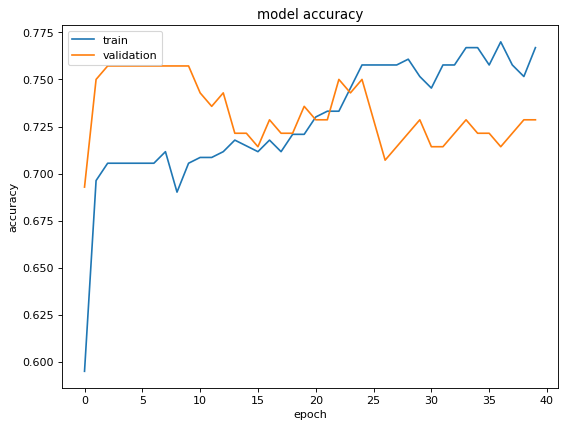

<Figure size 432x288 with 0 Axes>

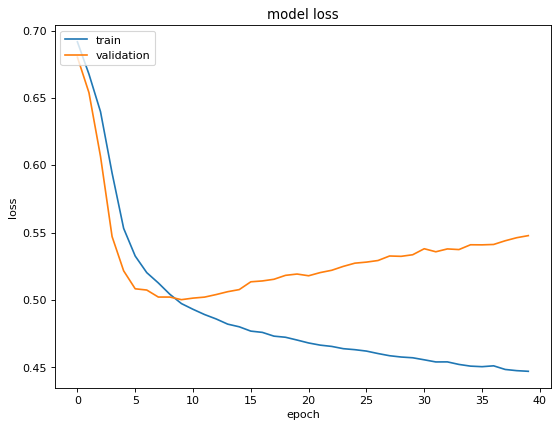

<Figure size 432x288 with 0 Axes>

In [12]:
# summarize history for accuracy
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('backpropagation-model-accuracy.png')
# summarize history for loss
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('backpropagation-model-loss.png')

In [13]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

466/466 [==============================] - 0s 64us/step


[0.47371367988668284, 0.7553648066111389]

In [14]:
final_classifier = Sequential()
#First Hidden Layer
final_classifier.add(Dense(8, activation='relu', input_dim=10))
#Second  Hidden Layer
final_classifier.add(Dense(4, activation='relu'))
#Output Layer
final_classifier.add(Dense(1, activation='sigmoid'))
final_classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
final_classifier.fit(X_train,y_train, batch_size=2, epochs=9)

Epoch 1/9
466/466 [==============================] - 3s 5ms/step - loss: 0.7603 - acc: 0.4378
Epoch 2/9
466/466 [==============================] - 1s 2ms/step - loss: 0.6111 - acc: 0.6481
Epoch 3/9
466/466 [==============================] - 1s 2ms/step - loss: 0.5530 - acc: 0.7039
Epoch 4/9
466/466 [==============================] - 1s 2ms/step - loss: 0.5299 - acc: 0.7103
Epoch 5/9
466/466 [==============================] - 1s 2ms/step - loss: 0.5183 - acc: 0.7167
Epoch 6/9
466/466 [==============================] - 1s 2ms/step - loss: 0.5106 - acc: 0.7210
Epoch 7/9
466/466 [==============================] - 1s 2ms/step - loss: 0.5025 - acc: 0.7232
Epoch 8/9
466/466 [==============================] - 1s 2ms/step - loss: 0.4957 - acc: 0.7339
Epoch 9/9
466/466 [==============================] - 1s 2ms/step - loss: 0.4894 - acc: 0.7339


In [15]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[68 12]
 [23 14]]
